In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [5]:
sep_coins = cv2.imread('shootanalysisdataset/schotanalyse/20200923_130914.jpg')

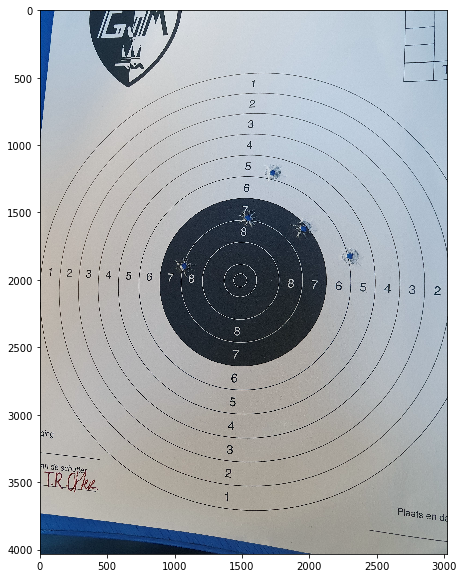

In [6]:
display(sep_coins)

In [7]:
# Median blur
# Grayscale
# Binary threshold
# Find Contours

In [8]:
sep_blur = cv2.medianBlur(sep_coins,205)

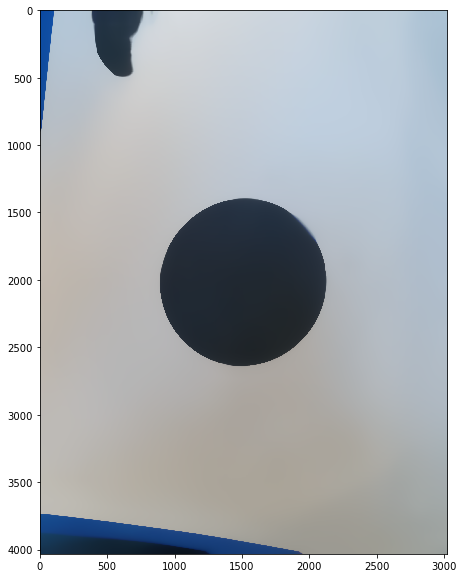

In [9]:
display(sep_blur)

In [10]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

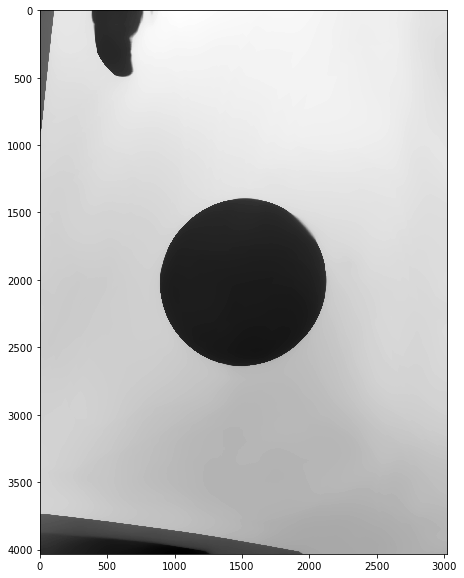

In [11]:
display(gray_sep_coins)

In [12]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,130,220,cv2.THRESH_BINARY_INV)

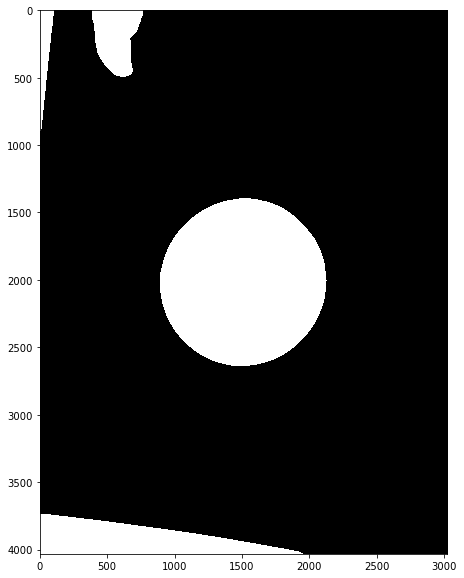

In [13]:
display(sep_thresh)

In [17]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [18]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

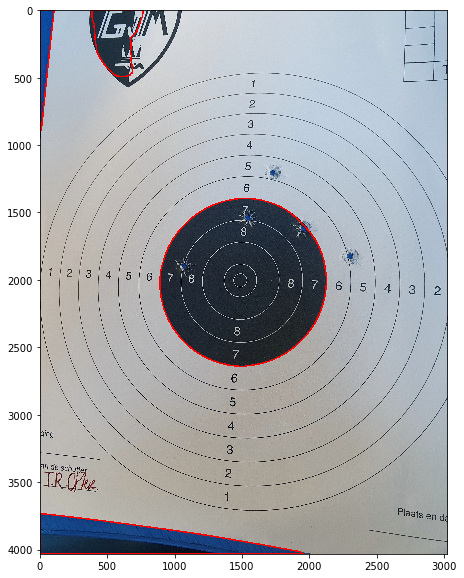

In [19]:
display(sep_coins)

In [57]:
img = cv2.imread('shootanalysisdataset/schotanalyse/20200923_130835.jpg')

In [58]:
img = cv2.medianBlur(img,35)

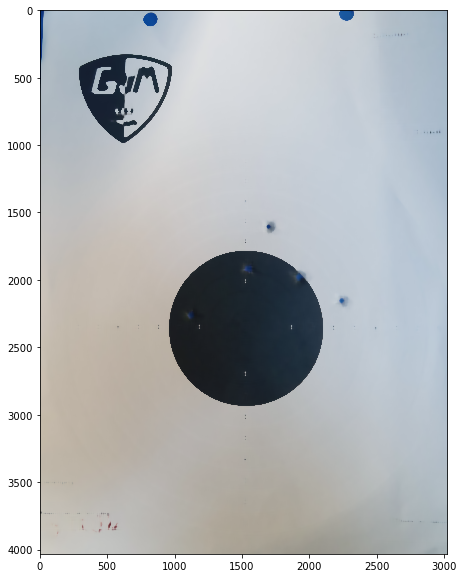

In [59]:
display(img)

In [63]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [64]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

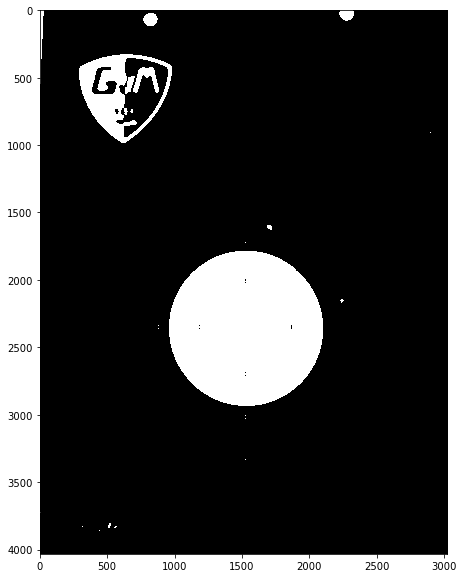

In [65]:
display(thresh)

In [66]:
# NOISE REMOVAL
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [67]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

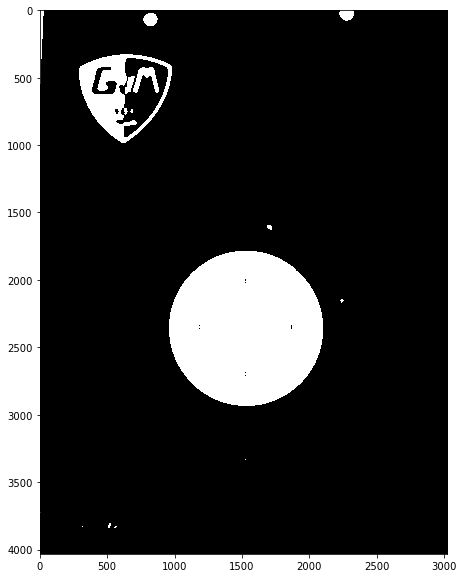

In [68]:
display(opening)

In [69]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

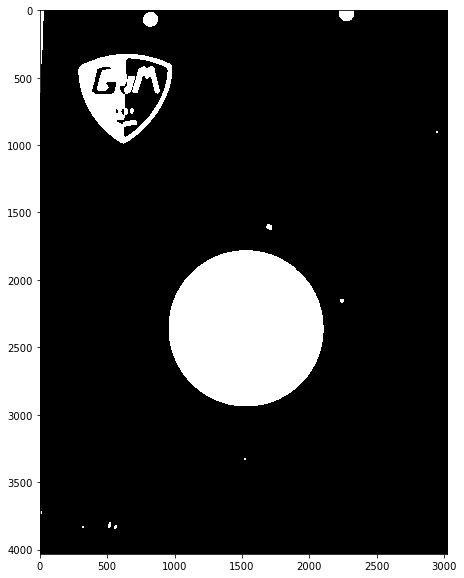

In [70]:
display(sure_bg)

In [71]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

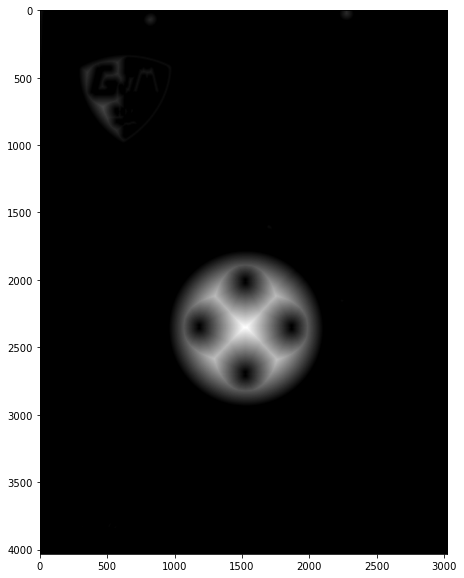

In [72]:
display(dist_transform)

In [73]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

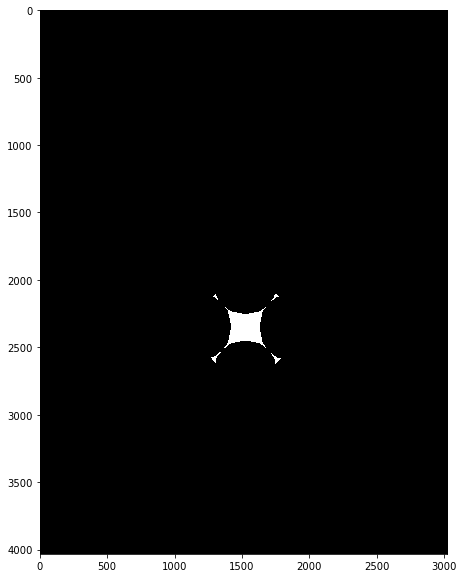

In [74]:
display(sure_fg)

In [75]:
sure_fg = np.uint8(sure_fg)

In [76]:
unknown = cv2.subtract(sure_bg,sure_fg)

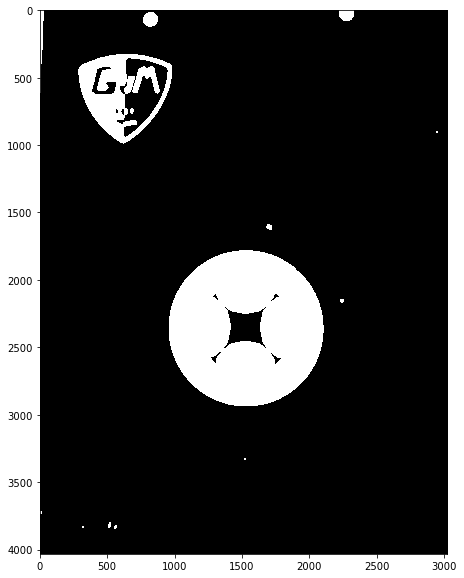

In [77]:
display(unknown)

In [78]:
ret , markers = cv2.connectedComponents(sure_fg)

In [79]:
markers = markers + 1

In [80]:
markers[unknown==255] = 0

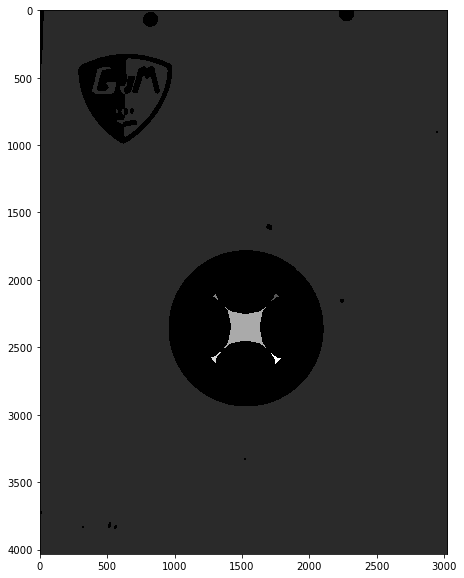

In [81]:
display(markers)

In [82]:
markers = cv2.watershed(img,markers)

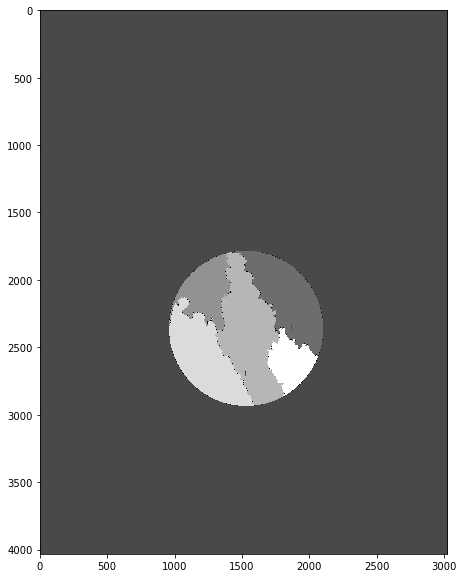

In [83]:
display(markers)

In [84]:
image,contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

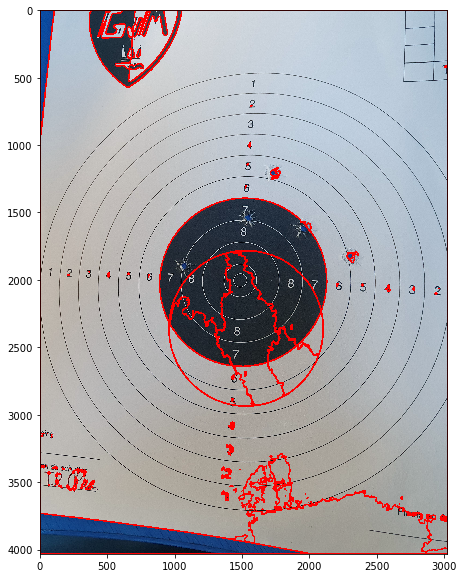

In [85]:
display(sep_coins)